In [125]:
# Importing required libraries

# this is library for importing and manipulating data
import pandas as pd
# natural language toolkit is a library used for developing python programs that work with human language data
import nltk
# stopwords is a bank of words that are usually contained of punctuations and words 
# that carries no variation therefore they are automatically omitted during analysis
from nltk.corpus import stopwords
import string
# a powerful library for visualizing data points
import seaborn as sns

## Data Exploration

In [126]:
# Read in the data
# this prints the first five data points of the data collected

df = pd.read_csv("data.csv")
df.head()

,label,tweet
0,0,"@user next chapter in life stas soon, looking..."
1,0,just booked our trip to europeðð»âï¸ @...
2,0,i am thankful for oxygen. #thankful #positive ...
3,1,the latest the volatile daily! thanks to @use...
4,0,someone explain why @user is being so moody


In [127]:
# Counting the sentiment output by uniqueness
# the method value_counts() groups the data by the class and counts the data points belonging to each class

df.label.value_counts()

0    75065
1     5488
Name: label, dtype: int64

In [128]:
# statistical summary of the dataset
# the method describe() counts or summarizes each of the distincts data points

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,80553.0,0.068129,0.251969,0.0,0.0,0.0,0.0,1.0


In [129]:
# statistical summary by the target 

df.groupby("label").describe().transpose()

label                                                         0  \
tweet count                                               75065   
      unique                                              16174   
      top     #model   i love u take with u all the time in ...   
      freq                                                  796   

label                                                         1  
tweet count                                                5488  
      unique                                               1164  
      top     @user #feminismiscancer #feminismisterrorism #...  
      freq                                                  136

In [130]:
# calculating the lenth of each tweet 
# the method len() counts each word of the tweet and adds it as a feature as a length_of_text

df["length_of_text"] = df["tweet"].apply(len)
df.head()

,label,tweet,length_of_text
0,0,"@user next chapter in life stas soon, looking...",105
1,0,just booked our trip to europeðð»âï¸ @...,97
2,0,i am thankful for oxygen. #thankful #positive ...,50
3,1,the latest the volatile daily! thanks to @use...,67
4,0,someone explain why @user is being so moody,46


<AxesSubplot:xlabel='label', ylabel='count'>

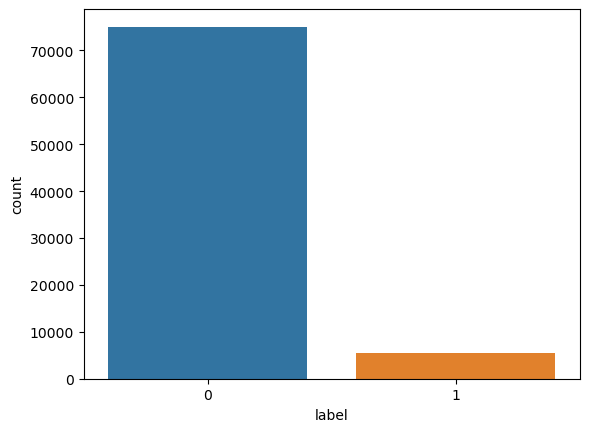

In [131]:
# visualization the number of data by airline sentiment using the sns library

sns.countplot(x = 'label', data = df)

In [132]:
# function to get rid of stopwords in each tweet
# the text_clean(*args) function is created to remove stopwords from each of the tweet to get a more precise variations

def text_clean(mess):
    # eliminate punctuations in the sentence
    new_sentence = [word for word in mess if word not in string.punctuation]
    new_sentence="".join(new_sentence)
    
    # eliminate and return stopwords from the sentence
    split_words = new_sentence.split()
    return [word for word in split_words if word.lower() not in stopwords.words("english")]

In [133]:
# apply function to each of the tweet in the text column

df["tweet"] = df["tweet"].apply(text_clean)
df.head()

,label,tweet,length_of_text
0,0,"[user, next, chapter, life, stas, soon, lookin...",105
1,0,"[booked, trip, europeðð»âï¸, user, use...",97
2,0,"[thankful, oxygen, thankful, positive]",50
3,1,"[latest, volatile, daily, thanks, user, user, ...",67
4,0,"[someone, explain, user, moody]",46


In [134]:
# since words or texts cannot be fed directly into the model, it has to be converted into numerical values:
# importing count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
# using the count vectorizer class to convert the collection of text documents to matrix of tokens 
# which assigns numeric value to each word present in the text

In [135]:
# convert the text into a numerical feature vector using bag of words technique
# bag of words is a technique which uses the count vectorizer to convert the texts
# into a numerical feature that can be analyzed by the model
# The fit() method takes the training data as arguments, which can be one array
bag_of_words_transformer = CountVectorizer(analyzer=text_clean).fit(df["tweet"])

In [136]:
# output the length of bag of words in vocabulary_attribute

bag_of_words_transformer.vocabulary_

{'usernextchapterlifestassoonlookinghousetodayfiancÃ©â\x9d¤ï¸\x8fð\x9f\x98\x80ð\x9f\x8fð\x9f\x91\x8dð\x9f\x8f»': 13504,
 'bookedtripeuropeð\x9f\x91\x8fð\x9f\x8f»â\x9c\x88ï¸\x8fuserusertravelwiseeurope2016londonparis': 1446,
 'thankfuloxygenthankfulpositive': 10567,
 'latestvolatiledailythanksuseruseruserspace': 6338,
 'someoneexplainusermoody': 9914,
 'worrying': 16470,
 'todaynationalsmilepowerdayshowpearlywhitessomeonedeservingmakedayone': 10983,
 'userradicalismshouldntcounteredterroristsseeusinhumansfreecantjudgecolorâ\x80¦': 13799,
 'usergreatappreciationsfrmeveryoneuperformancesoohappysirð\x9f\x99\x8cð\x9f\x98\x8a11hrsgowatchfilmgentlemanð\x9f\x98\x8að\x9f\x98\x8a': 12678,
 'cuddlingbabyitsfunloveâ\x80¦': 2326,
 'enderaamazonfinallytookfinalfantasyversusxiiientrydatabase': 2987,
 'userlotpakistanitwitterfolkmakeliketotallyliberalampopenmindeddeenimaaâ\x80¦': 13259,
 'littleanyafunwaiting28milersarriveride2016neotour': 6601,
 'daddydaysuseruser': 2376,
 'usersadleavingfirsthouseto

In [137]:
# store bag of words for tweets using transform method
#  the transform() will now transform this texts into numerical data

tweets_bag_of_words = bag_of_words_transformer.transform(df["tweet"])

In [138]:
# importing tfidf - term frequency inverse document frequency is a 
# measure that evaluates how relevant a word is to a document in a collection of documents. 
# which is done by mulitplying how many times a word appears in a document, 
# and the inverse document frequency of the word across a set of documents.

from sklearn.feature_extraction.text import TfidfTransformer

In [139]:
# apply tfidf transformer and fit the bag of words into it

tfidf_transformer = TfidfTransformer().fit(tweets_bag_of_words)

In [140]:
# output the shape of tfidf
# the shape function outuputs the number of the data by column and row

tweets_tfidf = tfidf_transformer.transform(tweets_bag_of_words)
tweets_tfidf.shape

(80553, 17227)

## Model Builidng

In [141]:
# importing the traintest split technique

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [142]:
# separating the features from target classes
# the features are the tweets and the target class is the  airline sentiment (positive or negative)

X = tweets_tfidf
y = df["label"]

In [143]:
# spliting dataset into training and testing set using the train test split technique
# the trainset is 80% while the test set is 20% since the model needs a lot of training data to be more accurate
# a greater training set is assigned for the model training

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64442, 17227)
(16111, 17227)
(64442,)
(16111,)


## Using Naive Bayes

In [144]:
# initializing the algorithm i.e creating an object of the classifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB


model = GaussianNB()

In [145]:
# training the neural network algorithm with the data
# the toarray() function converts the dataframe object the data was initially imported through into an array object
model.fit(X_train.toarray(), y_train)

GaussianNB()

In [146]:
# predicting for rest of the dataset not used before
# after training, the predict function will now predict/assign for values for the test set based on what the model has learned
predictions = model.predict(X_test.toarray())
predictions

array([0, 1, 1, ..., 0, 0, 1])

In [147]:
# this are machine learning metrics used for evaluating the model performance
# the accuracy score gives the score performance of the percentage of the right classifications of the model
# the classification report gives a full report the model's (precision, recall and fmeasure)
# the confusion matrix consist of the (true positive, false positive, true negative and false negative)

print("Accuracy Score: \n", accuracy_score(y_test, predictions))
print("Classification Report: \n", classification_report(y_test, predictions))
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))

Accuracy Score: 
 0.808950406554528
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89     15031
           1       0.26      1.00      0.41      1080

    accuracy                           0.81     16111
   macro avg       0.63      0.90      0.65     16111
weighted avg       0.95      0.81      0.85     16111

Confusion Matrix: 
 [[11953  3078]
 [    0  1080]]


In [148]:
# Check for a prediction 

tweet = df["tweet"][4]
bag_of_words_for_tweet = bag_of_words_transformer.transform([tweet])
tfidf_transformer_for_tweet = tfidf_transformer.transform(bag_of_words_for_tweet)

print("predicted: ", model.predict(tfidf_transformer_for_tweet[0].toarray()))
print("Actual: ", df.label[4])

predicted:  [0]
Actual:  0


In [149]:
x = ["kessler", "pangoto", "current"]
y = [84, 87, 99]

In [150]:
import matplotlib.pyplot as plt
import plotly.express as px


bar = px.bar(x = x, y = y, 
            title='Comparison of Previous Works vs Current Work', color = y)
bar.update_layout(xaxis_title='Researchers', yaxis_title='Accuracy Metrics')
bar.show()